In [ ]:
# Import necessary libraries

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
from datetime import datetime

In [4]:
# Set style for visualizations
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load your dataset (replace with your actual data source)
df = pd.read_csv('../data/raw_analyst_ratings.csv')

# For demonstration, let's create a sample dataframe
data = {
    'headline': ['FDA approves new cancer drug', 'Apple hits price target of $200', 
                 'Market surges on positive earnings', 'Fed announces interest rate hike',
                 'FDA approves new cancer drug', 'Tech stocks tumble on regulation fears'],
    'publisher': ['news@financialtimes.com', 'alerts@marketwatch.com',
                 'news@bloomberg.com', 'updates@reuters.com',
                 'news@financialtimes.com', 'alerts@marketwatch.com'],
    'publication_date': ['2023-01-01 09:00', '2023-01-01 10:30',
                        '2023-01-02 08:45', '2023-01-02 15:00',
                        '2023-01-03 11:15', '2023-01-03 16:30']
}

df = pd.DataFrame(data)
df['publication_date'] = pd.to_datetime(df['publication_date'])


In [5]:
# 1. Descriptive Statistics
print("\n=== Descriptive Statistics ===")
# Headline length analysis
df['headline_length'] = df['headline'].apply(lambda x: len(x.split()))
print("\nHeadline length statistics:")
print(df['headline_length'].describe())

# Articles per publisher
print("\nArticles per publisher:")
print(df['publisher'].value_counts())

# Publication date analysis
df['publication_day'] = df['publication_date'].dt.day_name()
df['publication_hour'] = df['publication_date'].dt.hour
print("\nArticles per day:")
print(df['publication_day'].value_counts())



=== Descriptive Statistics ===

Headline length statistics:
count    6.000000
mean     5.333333
std      0.516398
min      5.000000
25%      5.000000
50%      5.000000
75%      5.750000
max      6.000000
Name: headline_length, dtype: float64

Articles per publisher:
publisher
news@financialtimes.com    2
alerts@marketwatch.com     2
news@bloomberg.com         1
updates@reuters.com        1
Name: count, dtype: int64

Articles per day:
publication_day
Sunday     2
Monday     2
Tuesday    2
Name: count, dtype: int64



=== Text Analysis ===

Top 10 most common words:
[('fda', 2), ('approves', 2), ('new', 2), ('cancer', 2), ('drug', 2), ('on', 2), ('apple', 1), ('hits', 1), ('price', 1), ('target', 1)]


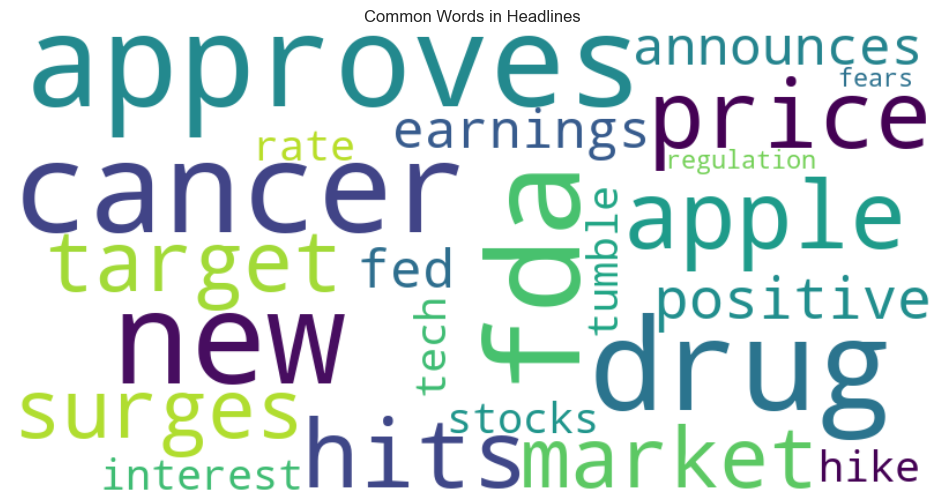


Identified topics:

Topic 1:
new approves cancer

Topic 2:
drug fda cancer

Topic 3:
drug cancer fda


In [6]:
# 2. Text Analysis (Topic Modeling)
print("\n=== Text Analysis ===")
# Word frequency analysis
all_text = ' '.join(df['headline']).lower()
words = re.findall(r'\b\w+\b', all_text)
word_freq = Counter(words)
print("\nTop 10 most common words:")
print(word_freq.most_common(10))

# Word cloud visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Headlines')
plt.show()

# Simple topic modeling using LDA
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['headline'])
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(dtm)

# Display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

print("\nIdentified topics:")
display_topics(lda, vectorizer.get_feature_names_out(), 3)


=== Time Series Analysis ===


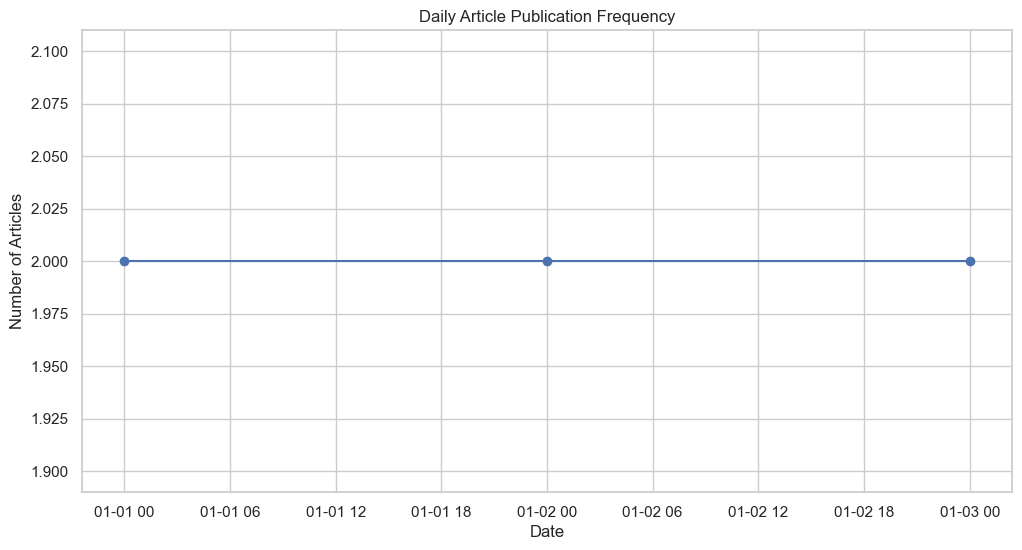

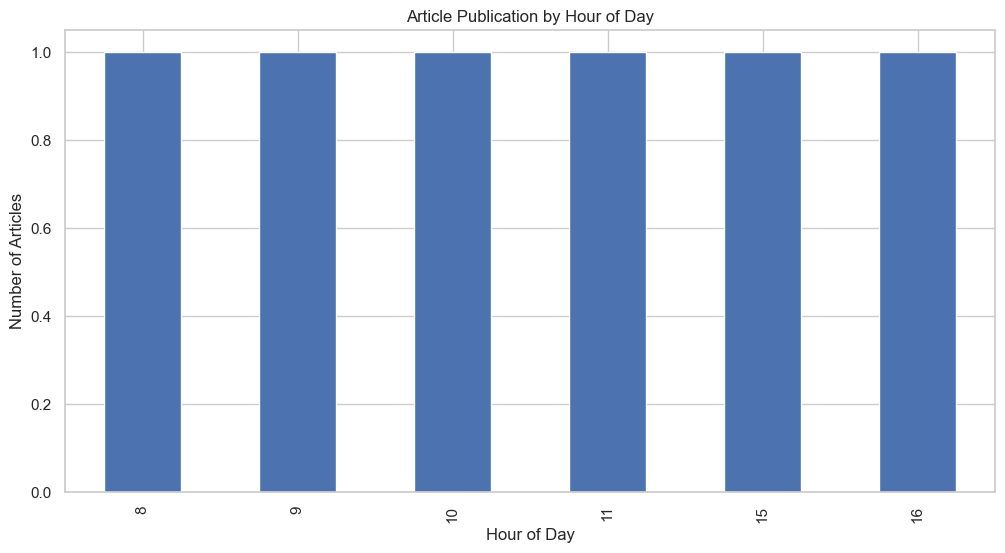

In [7]:
# 3. Time Series Analysis
print("\n=== Time Series Analysis ===")
# Publication frequency over time
df['date'] = df['publication_date'].dt.date
daily_counts = df.groupby('date').size()

plt.figure()
daily_counts.plot(kind='line', marker='o')
plt.title('Daily Article Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

# Publication hour analysis
hourly_counts = df['publication_hour'].value_counts().sort_index()
plt.figure()
hourly_counts.plot(kind='bar')
plt.title('Article Publication by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.show()


Publisher activity by day:
publication_day          Monday  Sunday  Tuesday
publisher                                       
alerts@marketwatch.com        0       1        1
news@bloomberg.com            1       0        0
news@financialtimes.com       0       1        1
updates@reuters.com           1       0        0


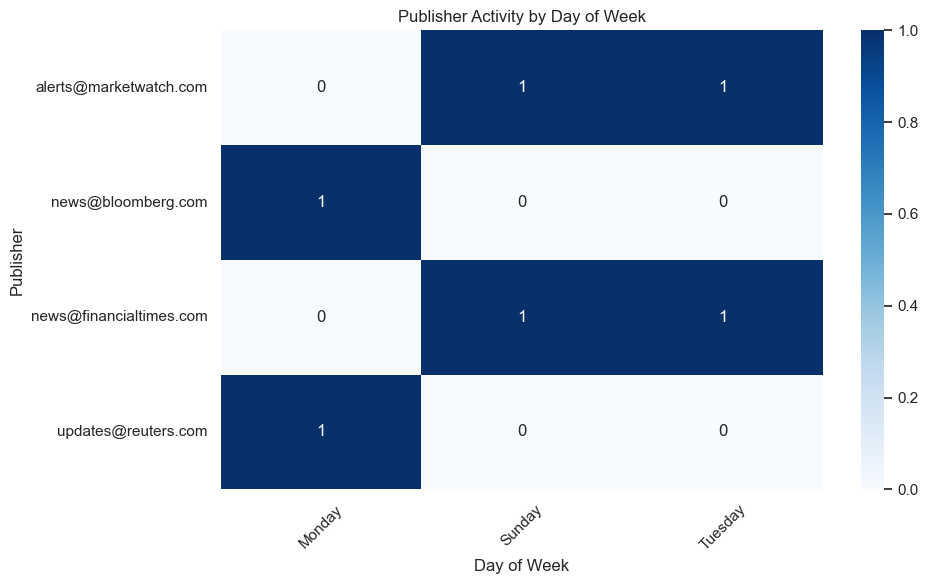


Common words for news@financialtimes.com:
[('fda', 2), ('approves', 2), ('new', 2), ('cancer', 2), ('drug', 2)]


C:\Users\user\AppData\Local\Temp\ipykernel_16696\3077687714.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=words_df, palette='viridis')


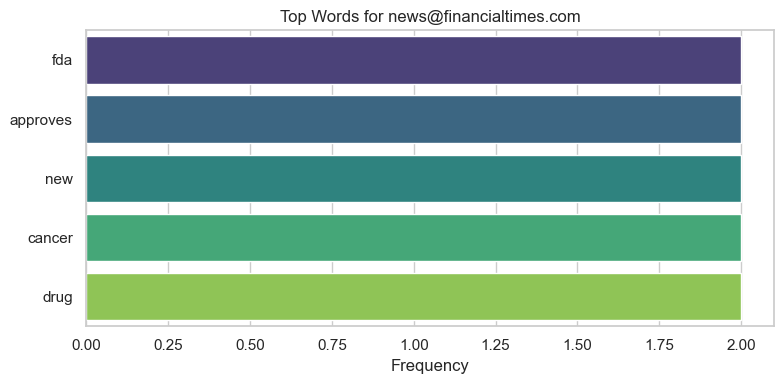


Common words for alerts@marketwatch.com:
[('apple', 1), ('hits', 1), ('price', 1), ('target', 1), ('200', 1)]


C:\Users\user\AppData\Local\Temp\ipykernel_16696\3077687714.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=words_df, palette='viridis')


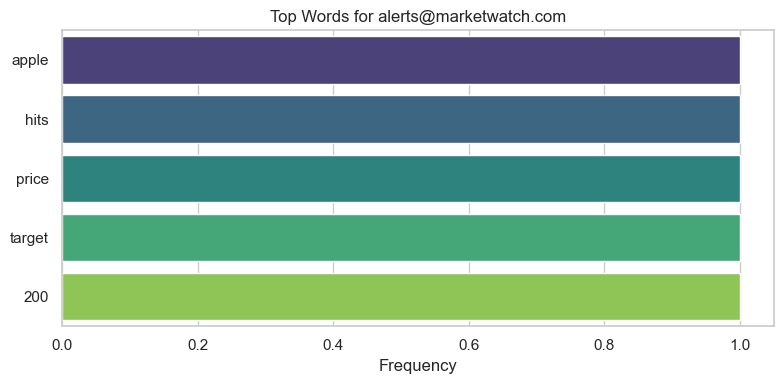


Common words for news@bloomberg.com:
[('market', 1), ('surges', 1), ('positive', 1), ('earnings', 1)]


C:\Users\user\AppData\Local\Temp\ipykernel_16696\3077687714.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=words_df, palette='viridis')


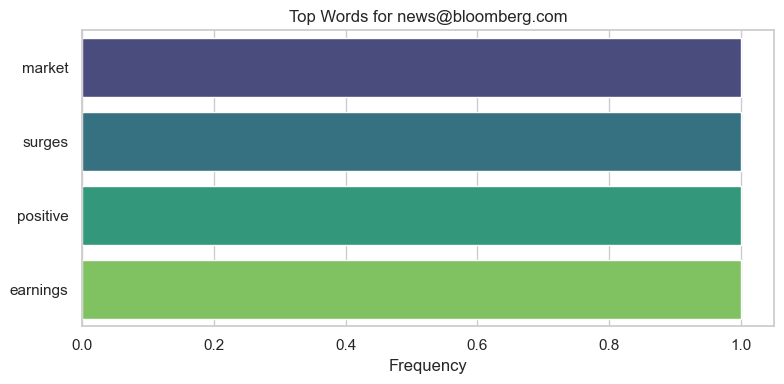


Common words for updates@reuters.com:
[('fed', 1), ('announces', 1), ('interest', 1), ('rate', 1), ('hike', 1)]


C:\Users\user\AppData\Local\Temp\ipykernel_16696\3077687714.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=words_df, palette='viridis')


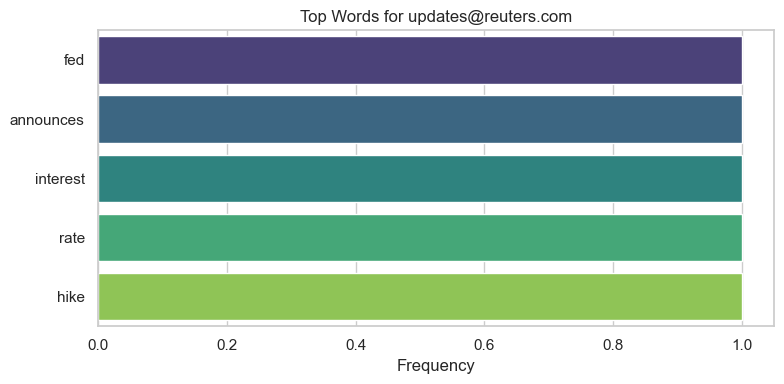

In [9]:
# Publisher activity by day - with visualization
publisher_day = pd.crosstab(df['publisher'], df['publication_day'])
print("\nPublisher activity by day:")
print(publisher_day)

# Visualize publisher activity by day
plt.figure(figsize=(10, 6))
sns.heatmap(publisher_day, annot=True, fmt='d', cmap='Blues')
plt.title('Publisher Activity by Day of Week')
plt.ylabel('Publisher')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Publisher's common topics - with visualizations
for publisher in df['publisher'].unique():
    print(f"\nCommon words for {publisher}:")
    publisher_text = ' '.join(df[df['publisher'] == publisher]['headline']).lower()
    words = [word for word in re.findall(r'\b\w+\b', publisher_text) if len(word) > 2] 
    common_words = Counter(words).most_common(5)
    print(common_words)
    
    # Create visualization for each publisher's common words
    if common_words:  # Only plot if there are words to show
        words_df = pd.DataFrame(common_words, columns=['word', 'count'])
        
        plt.figure(figsize=(8, 4))
        sns.barplot(x='count', y='word', data=words_df, palette='viridis')
        plt.title(f'Top Words for {publisher}')
        plt.xlabel('Frequency')
        plt.ylabel('')
        plt.tight_layout()
        plt.show()